In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
data = {'name':['Jason','Molly','Tina','Jake','Amy'],
       'age':[42,52,36,24,73],
        'preTestScore':[4,24,31,2,3],
        'postTestScore':[25,94,57,62,70]}
df = pd.DataFrame(data, columns=['name','age','preTestScore','postTestScore'])
df

,name,age,preTestScore,postTestScore
0,Jason,42,4,25
1,Molly,52,24,94
2,Tina,36,31,57
3,Jake,24,2,62
4,Amy,73,3,70


In [6]:
df['age'].sum()

227

In [7]:
df['age'].cumsum()

0     42
1     94
2    130
3    154
4    227
Name: age, dtype: int64

In [8]:
df['age'].count()

5

In [9]:
# looking for missing values
count_nan = len(df) - df.count()
count_nan

name             0
age              0
preTestScore     0
postTestScore    0
dtype: int64

In [11]:
# looking for missing values, another form
df.isnull().sum()

name             0
age              0
preTestScore     0
postTestScore    0
dtype: int64

In [12]:
df['age'].min()

24

In [13]:
df['age'].max()

73

In [15]:
# range
df['age'].max()-df['age'].min()

49

In [17]:
#frequency table
counts = df['age'].value_counts()
counts

52    1
73    1
42    1
36    1
24    1
Name: age, dtype: int64

In [18]:
#mean or average
df['age'].mean()

45.4

In [19]:
# median the value in the center of the data or 50th percentile
df['age'].sort_values()

3    24
2    36
0    42
1    52
4    73
Name: age, dtype: int64

In [20]:
# median again
df['age'].median()

42.0

In [21]:
# mode is the most frequent value in the data
df['age'].mode()

0    24
1    36
2    42
3    52
4    73
dtype: int64

In [22]:
# range is the difference between the largest and smallest number
df['age'].max()-df['age'].min()

49

In [23]:
# Interquartile range is the difference between the 75th and 25th precentiles
Q1=df['age'].quantile(0.25)
Q2=df['age'].quantile(0.75)
IQR= Q2-Q1
IQR

16.0

In [24]:
Q1

36.0

In [25]:
Q2

52.0

In [26]:
# Variance is the difference between each data point and the mean squared
df['age'].var()

340.79999999999995

In [28]:
# standad deviation it is the square root of the variance
df['age'].std()

18.46076921474292

In [30]:
#summary table
df['age'].describe()

count     5.000000
mean     45.400000
std      18.460769
min      24.000000
25%      36.000000
50%      42.000000
75%      52.000000
max      73.000000
Name: age, dtype: float64

In [31]:
df.describe()

,age,preTestScore,postTestScore
count,5.000000,5.000000,5.000000
mean,45.400000,12.800000,61.600000
std,18.460769,13.663821,24.905823
min,24.000000,2.000000,25.000000
25%,36.000000,3.000000,57.000000
50%,42.000000,4.000000,62.000000
75%,52.000000,24.000000,70.000000
max,73.000000,31.000000,94.000000


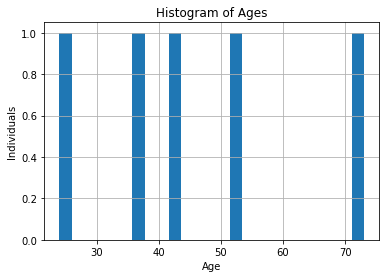

In [39]:
#Histogram table
import matplotlib.pyplot as plt
df['age'].hist(bins=25)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Individuals')

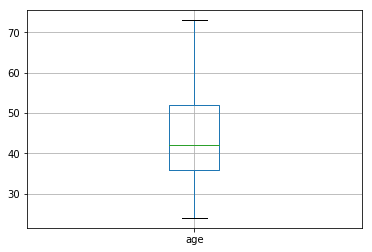

In [40]:
#Box and whisker plot
df.boxplot(column='age',sym='o',return_type='axes')

In [43]:
help(df.boxplot)

Help on method boxplot in module pandas.core.frame:

boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame column optionally grouped by some columns or
    other inputs
    
    Parameters
    ----------
    data : the pandas object holding the data
    column : column name or list of names, or vector
        Can be any valid input to groupby
    by : string or sequence
        Column in the DataFrame to group by
    ax : Matplotlib axes object, optional
    fontsize : int or string
    rot : label rotation angle
    figsize : A tuple (width, height) in inches
    grid : Setting this to True will show the grid
    layout : tuple (optional)
        (rows, columns) for the layout of the plot
    return_type : {None, 'axes', 'dict', 'both'}, default None
        The kind of object to return. The default is ``axes``
        'axes' returns 

In [47]:
# Finding Outliers
df['age_std']=(((df['age']-df['age'].mean()).apply(abs))/df['age'].std())
df.sort_values(by='age',ascending=False).head(6)
# If it the value is 3 it is an extreme outlier, 1.5 is a possible outlier

,name,age,preTestScore,postTestScore,age_std
4,Amy,73,3,70,1.495062
1,Molly,52,24,94,0.357515
0,Jason,42,4,25,0.184174
2,Tina,36,31,57,0.509188
3,Jake,24,2,62,1.159215


In [49]:
#Skewness if the distribution is asymetrical, negative is a longer tail to the left, 
#positive is a longer tail to the right
df['age'].skew()

0.70478411035663524

In [50]:
#Kurtosis
# When less than 3 the distribution looks more flat, platykurtik
# 3 is a normal distribution
# more than 3 the distibution looks more like a peak, leptokurtic
df['age'].kurt()

0.60827774747074237